<a id='pd'></a>  
# Pandas DataFrames

## Key points  
- read_csv:  
  - sep=
  - skiprows=n  
  - skiprows=[n]  
  - usecols=  
  - index_col=  
  - parse_dates=[]  
  - na_values=[]  
- df[ ].plot()  
- .round(x).astype(int)  
- .sort_values(by=  
- .dropna(subset=[])  
- .to_csv(file_path,  
  - sep=   
  - index=False  
  - float_format="%.1f"  
- df[col].agg(['mean','min','max']).T  
- integer date column to string:  
  - df['YEARMMDD']=df['YR--MODAHRMN'].astype(str).str[0:8]  
  - stats = df.groupby(['YEARMMDD'])['Celsius'].agg(['count','mean','min','max'])  
- .resample  
  - df with date index:  
    - stats= df['Celsius'].resample('D').agg(['count','mean','min','max'])  

[Create](#pd-create)  
[Import](#pd-import)  
[Attributes](#pd-attributes)   
[Aggregate](#pd-aggregate)    
[Select](#pd-select)  
[Plot](#pd-plot)  
[Transform](#pd-transform)  
[Filter](#pd-filter)  
[Missing Values](#pd-missing)  
[Export](#pd-export)  
[Exercise](#pd-exercise) 

## Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Parameters

In [2]:
# shows result of cell without needing print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

In [3]:
pd.set_option('display.max_rows',8)
#defaults: pd.set_option('display.max_columns',20,'display.max_rows',60,'display.max_colwidth',50)

## Directories

In [4]:
home_dir = home_dir = os.path.expanduser("~")
work_dir = os.path.join(home_dir, 'eda', 'gpy')
data_dir = os.path.join(work_dir,'data') 
save_dir = os.path.join(work_dir,'save') 
os.chdir(work_dir)
os.getcwd()

'/Users/forest/eda/gpy'

<a id='pd-create'></a>
## Create

[Return to Start of Notebook](#pd)  

### series from list

#### pd.Series()

In [5]:
a_values = [4, 5, 6, 7.0]
a_series = pd.Series(a_values)

0    4.0
1    5.0
2    6.0
3    7.0
dtype: float64

#### with index

In [6]:
a_index = ["a", "b", "c", "d"]
a_series = pd.Series(a_values, index=a_index)
print(a_series)

a    4.0
b    5.0
c    6.0
d    7.0
dtype: float64


In [7]:
type(a_series)

pandas.core.series.Series

### dataframe from lists

In [8]:
# Station names
stations = [
    "Hanko Russarö",
    "Heinola Asemantaus",
    "Helsinki Kaisaniemi",
    "Helsinki Malmi airfield",
]

# Latitude coordinates of Weather stations
lats = [59.77, 61.2, 60.18, 60.25]

# Longitude coordinates of Weather stations
lons = [22.95, 26.05, 24.94, 25.05];

#### pd.DataFrame

In [9]:
new_data = pd.DataFrame(data={"station_name": stations,
                              "lat": lats,
                              "lon": lons})

,station_name,lat,lon
0,Hanko Russarö,59.77,22.95
1,Heinola Asemantaus,61.20,26.05
2,Helsinki Kaisaniemi,60.18,24.94
3,Helsinki Malmi airfield,60.25,25.05


In [10]:
type(new_data)

pandas.core.frame.DataFrame

### empty dataframe

In [11]:
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


<a id='pd-import'></a>
## Import

[Return to Start of Notebook](#pd)  

### file path

In [12]:
file_path = os.path.join(data_dir,"Kumpula-June-2016-w-metadata.txt")

'/Users/forest/eda/gpy/data/Kumpula-June-2016-w-metadata.txt'

### pd. read_csv

#### sep=

In [13]:
df = pd.read_csv(file_path,sep=',')
df.head(1)

,# Data file contents: Daily temperatures (mean,min,max) for Kumpula,Helsinki
0,# for June 1-30,2016,NaN,NaN


#### skiprows=

In [14]:
df1 = pd.read_csv(file_path,
                 sep=',',
                 skiprows=8)
df1.head(1)

,YEARMODA,TEMP,MAX,MIN
0,20160601,65.5,73.6,54.7


#### usecols=[]

In [15]:
temp_df = pd.read_csv(file_path,
                      sep=',',
                      skiprows=8,
                      usecols=['YEARMODA','TEMP'])
temp_df.head(1)

,YEARMODA,TEMP
0,20160601,65.5


#### index_col=

In [16]:
df2 = pd.read_csv(file_path,
                      sep=',',
                      skiprows=8,
                      index_col='YEARMODA')
df2.head(1)

,TEMP,MAX,MIN
YEARMODA,,,
20160601,65.5,73.6,54.7


#### parse_dates=[]

In [17]:
df3 = pd.read_csv(file_path,
                  sep=',',
                  skiprows=8,
                  parse_dates=['YEARMODA'],
                  index_col='YEARMODA')
df3.head(1)

,TEMP,MAX,MIN
YEARMODA,,,
2016-06-01,65.5,73.6,54.7


#### na_values=[]

In [18]:
df3 = pd.read_csv(file_path,
                  sep=',',
                  skiprows=8,
                  parse_dates=['YEARMODA'],
                  index_col='YEARMODA',
                  na_values=['*', '**', '***', '****', '*****', '******'])

df3.head(1)

,TEMP,MAX,MIN
YEARMODA,,,
2016-06-01,65.5,73.6,54.7


### .info()

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEARMODA  30 non-null     int64  
 1   TEMP      30 non-null     float64
 2   MAX       27 non-null     float64
 3   MIN       28 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.1 KB


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 20160601 to 20160630
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    30 non-null     float64
 1   MAX     27 non-null     float64
 2   MIN     28 non-null     float64
dtypes: float64(3)
memory usage: 960.0 bytes


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-06-01 to 2016-06-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TEMP    30 non-null     float64
 1   MAX     27 non-null     float64
 2   MIN     28 non-null     float64
dtypes: float64(3)
memory usage: 960.0 bytes


<a id='pd-attributes'></a>
## Attributes

[Return to Start of Notebook](#pd)  

Attributes  (minimally sufficient pandas)
- shape  
- columns  
- dtypes  
- index  

### .shape

In [22]:
df1.shape

(30, 4)

In [23]:
df3.shape

(30, 3)

#### .shape[0]

In [24]:
rows = df1.shape[0]

30

In [25]:
len(df1)

30

#### .shape[1]

In [26]:
cols = df1.shape[1]

4

In [27]:
cols = df3.shape[1]

3

In [28]:
len(df1.columns)

4

### .columns

In [29]:
df1.columns

Index(['YEARMODA', 'TEMP', 'MAX', 'MIN'], dtype='object')

In [30]:
df3.columns

Index(['TEMP', 'MAX', 'MIN'], dtype='object')

#### .columns.values

In [31]:
df1.columns.values

array(['YEARMODA', 'TEMP', 'MAX', 'MIN'], dtype=object)

#### list (  .columns)

In [32]:
col_names = list(df1.columns)

['YEARMODA', 'TEMP', 'MAX', 'MIN']

### .dtypes

In [33]:
df1.dtypes

YEARMODA      int64
TEMP        float64
MAX         float64
MIN         float64
dtype: object

In [34]:
df3.dtypes

TEMP    float64
MAX     float64
MIN     float64
dtype: object

### .index

#### RangeIndex

In [35]:
df1.index

RangeIndex(start=0, stop=30, step=1)

#### Int64Index

In [36]:
df2.index

Int64Index([20160601, 20160602, 20160603, 20160604, 20160605, 20160606,
            20160607, 20160608, 20160609, 20160610, 20160611, 20160612,
            20160613, 20160614, 20160615, 20160616, 20160617, 20160618,
            20160619, 20160620, 20160621, 20160622, 20160623, 20160624,
            20160625, 20160626, 20160627, 20160628, 20160629, 20160630],
           dtype='int64', name='YEARMODA')

#### DatetimeIndex

In [37]:
df3.index

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-04',
               '2016-06-05', '2016-06-06', '2016-06-07', '2016-06-08',
               '2016-06-09', '2016-06-10', '2016-06-11', '2016-06-12',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-18', '2016-06-19', '2016-06-20',
               '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24',
               '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', name='YEARMODA', freq=None)

<a id='pd-aggregate'></a>
## Aggregate

[Return to Start of Notebook](#pd)  

Aggregation Methods  (minimally sufficient pandas)
- describe
- count, sum, max, min  
- idxmax, idxmin 
- all, any  
- mean, median, mode, std, var      
- nunique   

### .describe()

In [38]:
df3.describe()

,TEMP,MAX,MIN
count,30.000000,27.000000,28.000000
mean,59.730000,68.040741,51.257143
std,5.475472,6.505575,5.498985
min,49.400000,54.100000,41.700000
25%,56.450000,64.650000,46.975000
50%,60.050000,69.100000,53.100000
75%,64.900000,72.050000,55.600000
max,69.600000,80.800000,60.300000


### .count()

In [39]:
df3.count()

TEMP    30
MAX     27
MIN     28
dtype: int64

### .idxmax()

In [40]:
df3.idxmax()

TEMP   2016-06-26
MAX    2016-06-02
MIN    2016-06-26
dtype: datetime64[ns]

### .mean()

In [41]:
df3.mean()

TEMP    59.730000
MAX     68.040741
MIN     51.257143
dtype: float64

<a id='pd-select'></a>
## Select

[Return to Start of Notebook](#pd)  

Subset Selection  (minimally sufficient pandas)  
- brackets 
- loc
- iloc

### columns []

#### single column

##### as series

In [42]:
sel = df3["TEMP"]

YEARMODA
2016-06-01    65.5
2016-06-02    65.8
2016-06-03    68.4
2016-06-04    57.5
              ... 
2016-06-27    60.7
2016-06-28    65.4
2016-06-29    65.8
2016-06-30    65.7
Name: TEMP, Length: 30, dtype: float64

##### as dataframe

In [43]:
sel = df3[["TEMP"]]

,TEMP
YEARMODA,
2016-06-01,65.5
2016-06-02,65.8
2016-06-03,68.4
2016-06-04,57.5
...,...
2016-06-27,60.7
2016-06-28,65.4
2016-06-29,65.8
2016-06-30,65.7


##### statistics

In [44]:
df3[["TEMP"]].describe()

,TEMP
count,30.000000
mean,59.730000
std,5.475472
min,49.400000
25%,56.450000
50%,60.050000
75%,64.900000
max,69.600000


In [45]:
avg_temp = df3["TEMP"].mean()

59.730000000000004

#### multiple columns

In [46]:
sel = df3[["MAX","MIN"]]

,MAX,MIN
YEARMODA,,
2016-06-01,73.6,54.7
2016-06-02,80.8,55.0
2016-06-03,NaN,55.6
2016-06-04,70.9,47.3
...,...,...
2016-06-27,70.0,NaN
2016-06-28,73.0,55.8
2016-06-29,73.2,NaN
2016-06-30,72.7,59.2


##### statistics

In [47]:
df1[['TEMP','MAX','MIN']].describe()

,TEMP,MAX,MIN
count,30.000000,27.000000,28.000000
mean,59.730000,68.040741,51.257143
std,5.475472,6.505575,5.498985
min,49.400000,54.100000,41.700000
25%,56.450000,64.650000,46.975000
50%,60.050000,69.100000,53.100000
75%,64.900000,72.050000,55.600000
max,69.600000,80.800000,60.300000


In [48]:
df1[['TEMP','MAX','MIN']].mean()

TEMP    59.730000
MAX     68.040741
MIN     51.257143
dtype: float64

### single row 

#### .iloc

In [49]:
df3.iloc[4]

TEMP    51.4
MAX     58.3
MIN     43.2
Name: 2016-06-05 00:00:00, dtype: float64

In [50]:
df3.iloc[[4]]

,TEMP,MAX,MIN
YEARMODA,,,
2016-06-05,51.4,58.3,43.2


#### .loc

In [51]:
row = df3.loc['2016-06-01']

TEMP    65.5
MAX     73.6
MIN     54.7
Name: 2016-06-01 00:00:00, dtype: float64

In [52]:
row = df3.loc[['2016-06-01']]

,TEMP,MAX,MIN
YEARMODA,,,
2016-06-01,65.5,73.6,54.7


### index slicing  
- dataframe[start_index:stop_index].

#### rows [beg,end+1]

In [53]:
selection = df3[0:5]
selection

,TEMP,MAX,MIN
YEARMODA,,,
2016-06-01,65.5,73.6,54.7
2016-06-02,65.8,80.8,55.0
2016-06-03,68.4,NaN,55.6
2016-06-04,57.5,70.9,47.3
2016-06-05,51.4,58.3,43.2


#### rows .iloc[beg,end+1]

In [54]:
selection = df3.iloc[0:5]
selection

,TEMP,MAX,MIN
YEARMODA,,,
2016-06-01,65.5,73.6,54.7
2016-06-02,65.8,80.8,55.0
2016-06-03,68.4,NaN,55.6
2016-06-04,57.5,70.9,47.3
2016-06-05,51.4,58.3,43.2


#### rows .loc[beg:end]

In [55]:
selection = df3.loc[['2016-06-01','2016-06-05']]
selection

,TEMP,MAX,MIN
YEARMODA,,,
2016-06-01,65.5,73.6,54.7
2016-06-05,51.4,58.3,43.2


### rows and columns

#### .iloc[rows, cols]

In [56]:
df3.iloc[0:5:, 0:2]

,TEMP,MAX
YEARMODA,,
2016-06-01,65.5,73.6
2016-06-02,65.8,80.8
2016-06-03,68.4,NaN
2016-06-04,57.5,70.9
2016-06-05,51.4,58.3


#### .loc[rows, cols]

In [57]:
selection = df3.loc[['2016-06-01','2016-06-05'], ["MAX","MIN"]]
selection

,MAX,MIN
YEARMODA,,
2016-06-01,73.6,54.7
2016-06-05,58.3,43.2


#### select and aggregate

In [58]:
avg_temp = df3['TEMP'].iloc[-7:].mean()

64.85714285714286

In [59]:
avg_temp = df3['TEMP'].loc['2016-06-24':'2016-06-30'].mean()

64.85714285714286

In [60]:
avg_temp = df3.loc['2016-06-24':'2016-06-30', 'TEMP'].mean()

64.85714285714286

### single value

In [61]:
df3.loc["2016-06-01", "TEMP"]

65.5

In [62]:
df3.iloc[0,0]

65.5

### unique values

#### .unique()

In [63]:
unique = df3["TEMP"].unique()
unique

array([65.5, 65.8, 68.4, 57.5, 51.4, 52.2, 56.9, 54.2, 49.4, 49.5, 54. ,
       55.4, 58.3, 59.7, 63.4, 57.8, 60.4, 57.3, 56.3, 59.3, 62.6, 61.7,
       60.9, 61.1, 65.7, 69.6, 60.7, 65.4])

#### .nunique()

In [64]:
df3["TEMP"].nunique()

28

<a id='pd-plot'></a>
## Plot

[Return to Start of Notebook](#pd)  

#### df.plot()

<AxesSubplot:>

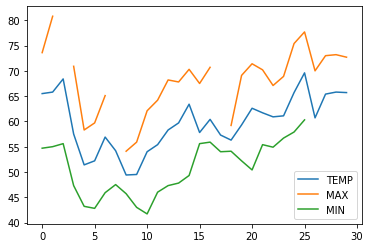

In [65]:
df1[["TEMP", "MAX", "MIN"]].plot()

<AxesSubplot:xlabel='YEARMODA'>

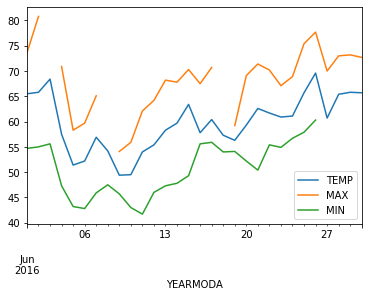

In [66]:
df3.plot()

<a id='pd-transform'></a>
## Transform

[Return to Start of Notebook](#pd)  

### deep copy

In [67]:
df1c = df1.copy()
df2c = df2.copy()
df3c = df3.copy();

### columns

#### new column

In [68]:
df1c["TEMP_CELSIUS"] = (df1c["TEMP"] - 32) / (9 / 5)
df1c.head(3)

,YEARMODA,TEMP,MAX,MIN,TEMP_CELSIUS
0,20160601,65.5,73.6,54.7,18.611111
1,20160602,65.8,80.8,55.0,18.777778
2,20160603,68.4,NaN,55.6,20.222222


In [69]:
df3c["DIFF"] = df3c["MAX"] - df3c["MIN"]
df3c.head(3)

,TEMP,MAX,MIN,DIFF
YEARMODA,,,,
2016-06-01,65.5,73.6,54.7,18.9
2016-06-02,65.8,80.8,55.0,25.8
2016-06-03,68.4,NaN,55.6,NaN


In [70]:
df3c["TEMP_CELSIUS"] = (df3c["TEMP"] - 32) / (9 / 5)
df3c.head(3)

,TEMP,MAX,MIN,DIFF,TEMP_CELSIUS
YEARMODA,,,,,
2016-06-01,65.5,73.6,54.7,18.9,18.611111
2016-06-02,65.8,80.8,55.0,25.8,18.777778
2016-06-03,68.4,NaN,55.6,NaN,20.222222


In [71]:
df3c["TEMP_KELVIN"] = df3c["TEMP_CELSIUS"] + 273.15
df3c.head(3)

,TEMP,MAX,MIN,DIFF,TEMP_CELSIUS,TEMP_KELVIN
YEARMODA,,,,,,
2016-06-01,65.5,73.6,54.7,18.9,18.611111,291.761111
2016-06-02,65.8,80.8,55.0,25.8,18.777778,291.927778
2016-06-03,68.4,NaN,55.6,NaN,20.222222,293.372222


#### rename

In [72]:
df3c.rename(columns = {"TEMP": "avg_F",
                     "MAX": "max_F",
                     "MIN": "min_F",
                     "TEMP_CELSIUS": "avg_C",}, inplace=True)
df3c.head(3)

,avg_F,max_F,min_F,DIFF,avg_C,TEMP_KELVIN
YEARMODA,,,,,,
2016-06-01,65.5,73.6,54.7,18.9,18.611111,291.761111
2016-06-02,65.8,80.8,55.0,25.8,18.777778,291.927778
2016-06-03,68.4,NaN,55.6,NaN,20.222222,293.372222


#### drop column

In [73]:
df3c = df3c.drop(["DIFF","TEMP_KELVIN"], axis = 1)
df3c.head(3)

,avg_F,max_F,min_F,avg_C
YEARMODA,,,,
2016-06-01,65.5,73.6,54.7,18.611111
2016-06-02,65.8,80.8,55.0,18.777778
2016-06-03,68.4,NaN,55.6,20.222222


### .astype()

In [74]:
df1c["TEMP"].astype(int).head() #truncates

0    65
1    65
2    68
3    57
4    51
Name: TEMP, dtype: int64

#### .round().astype()

In [75]:
df1c["TEMP"].round(0).astype(int).head()

0    66
1    66
2    68
3    58
4    51
Name: TEMP, dtype: int64

### sort

In [76]:
df3c.head(3)

,avg_F,max_F,min_F,avg_C
YEARMODA,,,,
2016-06-01,65.5,73.6,54.7,18.611111
2016-06-02,65.8,80.8,55.0,18.777778
2016-06-03,68.4,NaN,55.6,20.222222


#### .sort_values(by=)

In [77]:
sorted_temps = df3c.sort_values(by="avg_C")
sorted_temps.head(3)

,avg_F,max_F,min_F,avg_C
YEARMODA,,,,
2016-06-09,49.4,54.1,45.7,9.666667
2016-06-10,49.5,55.9,43.0,9.722222
2016-06-05,51.4,58.3,43.2,10.777778


#### ascending=False

In [78]:
sorted_temps = df3c.sort_values(by="avg_C",ascending=False)
sorted_temps.head(3)

,avg_F,max_F,min_F,avg_C
YEARMODA,,,,
2016-06-26,69.6,77.7,60.3,20.888889
2016-06-03,68.4,NaN,55.6,20.222222
2016-06-02,65.8,80.8,55.0,18.777778


<a id='pd-filter'></a>
## Filter

[Return to Start of Notebook](#pd)  

### using logical test

In [79]:
filt = df3c["avg_C"] > 15
sel = df3c[filt]
sel.head(3)

,avg_F,max_F,min_F,avg_C
YEARMODA,,,,
2016-06-01,65.5,73.6,54.7,18.611111
2016-06-02,65.8,80.8,55.0,18.777778
2016-06-03,68.4,NaN,55.6,20.222222


In [80]:
filt = df3c["avg_C"] > 15
sel = df3.loc[filt]
sel.head(3)

,TEMP,MAX,MIN
YEARMODA,,,
2016-06-01,65.5,73.6,54.7
2016-06-02,65.8,80.8,55.0
2016-06-03,68.4,NaN,55.6


In [81]:
filt1 =  df3c["avg_C"] > 15
filt2 =  df3c.index >= '2016-06-15'
filt = filt1 & filt2
warm_temps = df3c.loc[filt]
warm_temps.head(3)

,avg_F,max_F,min_F,avg_C
YEARMODA,,,,
2016-06-15,63.4,70.3,49.3,17.444444
2016-06-17,60.4,70.7,55.9,15.777778
2016-06-20,59.3,69.1,52.2,15.166667


In [82]:
filt1 =  df1c["TEMP_CELSIUS"] > 15
filt2 =  df1c["YEARMODA"] >= 20160615
filt = filt1 & filt2
warm_temps = df1c.loc[filt]
warm_temps.head(3)

,YEARMODA,TEMP,MAX,MIN,TEMP_CELSIUS
14,20160615,63.4,70.3,49.3,17.444444
16,20160617,60.4,70.7,55.9,15.777778
19,20160620,59.3,69.1,52.2,15.166667


#### reset_index()

In [83]:
warm_temps = warm_temps.reset_index(drop=True)
warm_temps
warm_temps.head(3)

,YEARMODA,TEMP,MAX,MIN,TEMP_CELSIUS
0,20160615,63.4,70.3,49.3,17.444444
1,20160617,60.4,70.7,55.9,15.777778
2,20160620,59.3,69.1,52.2,15.166667


In [84]:
filt = df1c["YEARMODA"] >= 20160624
avg_temp = df1c['TEMP_CELSIUS'].loc[filt].mean()

18.253968253968257

In [85]:
filt = df3c.index >= '2016-06-24'
avg_temp = df3c['avg_C'].loc[filt].mean()

18.253968253968257

<a id='pd-missing'></a>
## Missing Values

[Return to Start of Notebook](#pd)  

### .dropna()

In [86]:
warm_temps_clean = warm_temps.dropna(subset=["MIN"])
warm_temps_clean

,YEARMODA,TEMP,MAX,MIN,TEMP_CELSIUS
0,20160615,63.4,70.3,49.3,17.444444
1,20160617,60.4,70.7,55.9,15.777778
2,20160620,59.3,69.1,52.2,15.166667
3,20160621,62.6,71.4,50.4,17.000000
...,...,...,...,...,...
7,20160625,65.7,75.4,57.9,18.722222
8,20160626,69.6,77.7,60.3,20.888889
10,20160628,65.4,73.0,55.8,18.555556
12,20160630,65.7,72.7,59.2,18.722222


### .fillna()

In [87]:
warm_temps.fillna(-9999)

,YEARMODA,TEMP,MAX,MIN,TEMP_CELSIUS
0,20160615,63.4,70.3,49.3,17.444444
1,20160617,60.4,70.7,55.9,15.777778
2,20160620,59.3,69.1,52.2,15.166667
3,20160621,62.6,71.4,50.4,17.000000
...,...,...,...,...,...
9,20160627,60.7,70.0,-9999.0,15.944444
10,20160628,65.4,73.0,55.8,18.555556
11,20160629,65.8,73.2,-9999.0,18.777778
12,20160630,65.7,72.7,59.2,18.722222


In [88]:
warm_temps

,YEARMODA,TEMP,MAX,MIN,TEMP_CELSIUS
0,20160615,63.4,70.3,49.3,17.444444
1,20160617,60.4,70.7,55.9,15.777778
2,20160620,59.3,69.1,52.2,15.166667
3,20160621,62.6,71.4,50.4,17.000000
...,...,...,...,...,...
9,20160627,60.7,70.0,NaN,15.944444
10,20160628,65.4,73.0,55.8,18.555556
11,20160629,65.8,73.2,NaN,18.777778
12,20160630,65.7,72.7,59.2,18.722222


<a id='pd-export'></a>
## Export

[Return to Start of Notebook](#pd)  

### .to_csv()

In [89]:
file_name = "Kumpula_temps_June_2016.csv"
file_path = os.path.join(save_dir, file_name)

'/Users/forest/eda/gpy/save/Kumpula_temps_June_2016.csv'

In [90]:
df3.to_csv(file_path, sep=",")

### index=False

In [91]:
file_name = "Kumpula_temps_above15_June_2016.csv"
file_path = os.path.join(save_dir, file_name)

'/Users/forest/eda/gpy/save/Kumpula_temps_above15_June_2016.csv'

In [92]:
warm_temps.to_csv(file_path,  sep=",", index=False)

### float_format

In [93]:
warm_temps.to_csv(file_path,  sep=",", index=False, float_format="%.1f")

<a id='pd-exercise'></a>
## Exercise

[Return to Start of Notebook](#pd)  

### Prob 1

In [94]:
file_name = "6153237444115dat.csv"
file_path = os.path.join(data_dir, file_name)
data = pd.read_csv(file_path,
                 sep=',',
                  na_values=['*', '**', '***', '****', '*****', '******'])
data.head(3)

,USAF,WBAN,YR--MODAHRMN,DIR,SPD,GUS,CLG,SKC,L,M,...,SLP,ALT,STP,MAX,MIN,PCP01,PCP06,PCP24,PCPXX,SD
0,28450,99999,201705010000,174.0,10.0,14.0,NaN,NaN,NaN,NaN,...,1009.2,NaN,984.1,NaN,NaN,NaN,NaN,NaN,NaN,35.0
1,28450,99999,201705010020,180.0,10.0,NaN,4.0,NaN,NaN,NaN,...,NaN,29.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28450,99999,201705010050,190.0,10.0,NaN,4.0,NaN,NaN,NaN,...,NaN,29.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
row_count = len(data)
print(f"There are {row_count} rows")

There are 11694 rows


In [96]:
column_names = data.columns
print(f"The columns are: \n{column_names}")

The columns are: 
Index(['USAF', 'WBAN', 'YR--MODAHRMN', 'DIR', 'SPD', 'GUS', 'CLG', 'SKC', 'L',
       'M', 'H', 'VSB', 'MW', 'MW.1', 'MW.2', 'MW.3', 'AW', 'AW.1', 'AW.2',
       'AW.3', 'W', 'TEMP', 'DEWP', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01',
       'PCP06', 'PCP24', 'PCPXX', 'SD'],
      dtype='object')


In [97]:
column_names = list(data.columns)
print(f"The columns are: \n{column_names}")

The columns are: 
['USAF', 'WBAN', 'YR--MODAHRMN', 'DIR', 'SPD', 'GUS', 'CLG', 'SKC', 'L', 'M', 'H', 'VSB', 'MW', 'MW.1', 'MW.2', 'MW.3', 'AW', 'AW.1', 'AW.2', 'AW.3', 'W', 'TEMP', 'DEWP', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01', 'PCP06', 'PCP24', 'PCPXX', 'SD']


In [98]:
column_datatypes = data.dtypes
print(f"The column types are: \n{column_datatypes}")

The column types are: 
USAF              int64
WBAN              int64
YR--MODAHRMN      int64
DIR             float64
                 ...   
PCP06           float64
PCP24           float64
PCPXX           float64
SD              float64
Length: 33, dtype: object


In [99]:
temp_mean = data ["TEMP"].mean()
print(f"The mean temperature in Fahrenheit is {round(temp_mean,1)}")

The mean temperature in Fahrenheit is 52.2


In [100]:
temp_max_std = data ["MAX"].std()
print(f"The standard deviation of maximum temperature is {round(temp_max_std, 1)}")

The standard deviation of maximum temperature is 10.3


In [101]:
station_count = data["USAF"].nunique()
print(f"The number of unique stations is {station_count}")

The number of unique stations is 2


### Prob 2

In [102]:
selected = data[["USAF", "YR--MODAHRMN", "TEMP", "MAX", "MIN"]]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11694 entries, 0 to 11693
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USAF          11694 non-null  int64  
 1   YR--MODAHRMN  11694 non-null  int64  
 2   TEMP          11691 non-null  float64
 3   MAX           486 non-null    float64
 4   MIN           486 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 456.9 KB


In [103]:
selected = selected.dropna(subset=["TEMP"])
len(selected)

11691

In [104]:
selected["Celsius"] = (round((selected["TEMP"] - 32) / 1.8,0)).astype(int)
selected.head(3)

,USAF,YR--MODAHRMN,TEMP,MAX,MIN,Celsius
0,28450,201705010000,31.0,NaN,NaN,-1
1,28450,201705010020,30.0,NaN,NaN,-1
2,28450,201705010050,30.0,NaN,NaN,-1


In [105]:
selected.dtypes

USAF              int64
YR--MODAHRMN      int64
TEMP            float64
MAX             float64
MIN             float64
Celsius           int64
dtype: object

In [106]:
filt = selected["USAF"] == 29980
kumpula = selected[filt]
len(kumpula)

2924

In [107]:
kumpula.head(3)

,USAF,YR--MODAHRMN,TEMP,MAX,MIN,Celsius
8770,29980,201705010000,37.0,NaN,NaN,3
8771,29980,201705010100,37.0,NaN,NaN,3
8772,29980,201705010200,37.0,NaN,NaN,3


In [108]:
filt = selected["USAF"] == 28450
rovaniemi = selected[filt]
len(rovaniemi)

8767

In [109]:
rovaniemi.head(3)

,USAF,YR--MODAHRMN,TEMP,MAX,MIN,Celsius
0,28450,201705010000,31.0,NaN,NaN,-1
1,28450,201705010020,30.0,NaN,NaN,-1
2,28450,201705010050,30.0,NaN,NaN,-1


In [110]:
file_name = "Kumpula_temps_May_Aug_2017.csv"
file_path = os.path.join(save_dir, file_name)

kumpula.to_csv(file_path,  sep=",", index=False, float_format="%.2f")

In [111]:
file_name = "Rovaniemi_temps_May_Aug_2017.csv"
file_path = os.path.join(save_dir, file_name)

rovaniemi.to_csv(file_path,  sep=",", index=False, float_format="%.2f")

### Prob 3

In [112]:
file_name = "Kumpula_temps_May_Aug_2017.csv"
file_path = os.path.join(save_dir, file_name)
kumpula = pd.read_csv(file_path,
                      sep=',')
kumpula.head(1)

,USAF,YR--MODAHRMN,TEMP,MAX,MIN,Celsius
0,29980,201705010000,37.0,NaN,NaN,3


In [113]:
file_name = "Rovaniemi_temps_May_Aug_2017.csv"
file_path = os.path.join(save_dir, file_name)
rovaniemi = pd.read_csv(file_path,
                      sep=',')
rovaniemi.head(1)

,USAF,YR--MODAHRMN,TEMP,MAX,MIN,Celsius
0,28450,201705010000,31.0,NaN,NaN,-1


In [114]:
kumpula_median = kumpula["TEMP"].median()

58.0

In [115]:
rovaniemi_median = rovaniemi["TEMP"].median()

52.0

In [116]:
print(f"Kumpula median: {kumpula_median}")
print(f"Rovaniemi median: {rovaniemi_median}")

Kumpula median: 58.0
Rovaniemi median: 52.0


In [117]:
filt1 = kumpula["YR--MODAHRMN"] >= 201705010000
filt2 = kumpula["YR--MODAHRMN"] < 201706010000
filt = filt1 & filt2
kumpula_may = kumpula[filt]
print(f"First values in May, Kumpula:\n{kumpula_may.head(1)}")
print(f"Last values in May, Kumpula:\n{kumpula_may.tail(1)}")

First values in May, Kumpula:
    USAF  YR--MODAHRMN  TEMP  MAX  MIN  Celsius
0  29980  201705010000  37.0  NaN  NaN        3
Last values in May, Kumpula:
      USAF  YR--MODAHRMN  TEMP  MAX  MIN  Celsius
740  29980  201705312300  43.0  NaN  NaN        6


In [118]:
filt1 = kumpula["YR--MODAHRMN"] >= 201706010000
filt2 = kumpula["YR--MODAHRMN"] < 201707010000
filt = filt1 & filt2
kumpula_june = kumpula[filt];
print(f"First values in June, Kumpula:\n{kumpula_june.head(1)}\n")
print(f"Last values in June, Kumpula:\n{kumpula_june.tail(1)}")

First values in June, Kumpula:
      USAF  YR--MODAHRMN  TEMP  MAX  MIN  Celsius
741  29980  201706010000  42.0  NaN  NaN        6

Last values in June, Kumpula:
       USAF  YR--MODAHRMN  TEMP  MAX  MIN  Celsius
1454  29980  201706302300  61.0  NaN  NaN       16


In [119]:
filt1 = rovaniemi["YR--MODAHRMN"] >= 201705010000
filt2 = rovaniemi["YR--MODAHRMN"] < 201706010000
filt = filt1 & filt2
rovaniemi_may = rovaniemi[filt]
print(f"First values in May, Rovaniemi:\n{rovaniemi_may.head(1)}\n")
print(f"Last values in May, Rovaniemi:\n{rovaniemi_may.tail(1)}")

First values in May, Rovaniemi:
    USAF  YR--MODAHRMN  TEMP  MAX  MIN  Celsius
0  28450  201705010000  31.0  NaN  NaN       -1

Last values in May, Rovaniemi:
       USAF  YR--MODAHRMN  TEMP  MAX  MIN  Celsius
2219  28450  201705312350  30.0  NaN  NaN       -1


In [120]:
filt1 = rovaniemi["YR--MODAHRMN"] >= 201706010000
filt2 = rovaniemi["YR--MODAHRMN"] < 201707010000
filt = filt1 & filt2
rovaniemi_june = rovaniemi[filt]
print(f"First values in June, Rovaniemi:\n{rovaniemi_june.head(1)}\n")
print(f"Last values in June, Rovaniemi:\n{rovaniemi_june.tail(1)}")

First values in June, Rovaniemi:
       USAF  YR--MODAHRMN  TEMP  MAX  MIN  Celsius
2220  28450  201706010000  32.0  NaN  NaN        0

Last values in June, Rovaniemi:
       USAF  YR--MODAHRMN  TEMP  MAX  MIN  Celsius
4346  28450  201706302350  57.0  NaN  NaN       14


In [121]:
kumpula_may[["TEMP"]].describe().T

,count,mean,std,min,25%,50%,75%,max
TEMP,741.0,49.564103,8.992956,28.0,44.0,50.0,56.0,73.0


In [122]:
kumpula_june[["TEMP"]].describe().T

,count,mean,std,min,25%,50%,75%,max
TEMP,714.0,56.735294,7.33213,37.0,52.0,56.0,62.0,75.0


In [123]:
rovaniemi_may[["TEMP"]].describe().T

,count,mean,std,min,25%,50%,75%,max
TEMP,2220.0,37.385135,6.883362,19.0,32.0,37.0,42.0,59.0


In [124]:
rovaniemi_june[["TEMP"]].describe().T

,count,mean,std,min,25%,50%,75%,max
TEMP,2127.0,51.834979,9.793087,30.0,45.0,52.0,57.0,74.0


In [125]:
kumpula_may[["TEMP"]].agg(['mean','min','max']).T

,mean,min,max
TEMP,49.564103,28.0,73.0


In [126]:
kumpula_june[["TEMP"]].agg(['mean','min','max']).T

,mean,min,max
TEMP,56.735294,37.0,75.0


In [127]:
rovaniemi_may[["TEMP"]].agg(['mean','min','max']).T

,mean,min,max
TEMP,37.385135,19.0,59.0


In [128]:
rovaniemi_june[["TEMP"]].agg(['mean','min','max']).T

,mean,min,max
TEMP,51.834979,30.0,74.0


### Prob 4

#### option 1

In [129]:
file_name = "Kumpula_temps_May_Aug_2017.csv"
file_path = os.path.join(save_dir, file_name)
kumpula = pd.read_csv(file_path,
                      sep=',')
kumpula.head(3)

,USAF,YR--MODAHRMN,TEMP,MAX,MIN,Celsius
0,29980,201705010000,37.0,NaN,NaN,3
1,29980,201705010100,37.0,NaN,NaN,3
2,29980,201705010200,37.0,NaN,NaN,3


In [130]:
kumpula['YEARMMDD']=kumpula['YR--MODAHRMN'].astype(str).str[0:8]

In [131]:
kumpula.head(3)

,USAF,YR--MODAHRMN,TEMP,MAX,MIN,Celsius,YEARMMDD
0,29980,201705010000,37.0,NaN,NaN,3,20170501
1,29980,201705010100,37.0,NaN,NaN,3,20170501
2,29980,201705010200,37.0,NaN,NaN,3,20170501


In [132]:
kumpula_daily_stats = kumpula.groupby(['YEARMMDD'])['Celsius']\
                             .agg(['count','mean','min','max'])
kumpula_daily_stats.head(3)

,count,mean,min,max
YEARMMDD,,,,
20170501,24,7.625000,3,12
20170502,24,9.750000,2,16
20170503,24,9.208333,4,13


#### option 2

In [133]:
file_name = "Kumpula_temps_May_Aug_2017.csv"
file_path = os.path.join(save_dir, file_name)
kumpula = pd.read_csv(file_path,
                      sep=',',
                      parse_dates=['YR--MODAHRMN'],
                      index_col = 'YR--MODAHRMN')
kumpula.head(3)

,USAF,TEMP,MAX,MIN,Celsius
YR--MODAHRMN,,,,,
2017-05-01 00:00:00,29980,37.0,NaN,NaN,3
2017-05-01 01:00:00,29980,37.0,NaN,NaN,3
2017-05-01 02:00:00,29980,37.0,NaN,NaN,3


In [134]:
kumpula_daily_stats = kumpula['Celsius']\
                             .resample('D')\
                             .agg(['count','mean','min','max'])
kumpula_daily_stats.head(3)

,count,mean,min,max
YR--MODAHRMN,,,,
2017-05-01,24,7.625000,3,12
2017-05-02,24,9.750000,2,16
2017-05-03,24,9.208333,4,13
